<a href="https://colab.research.google.com/github/Shalini-13/Shalini-13/blob/main/hw2is733(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

In [3]:
data = pd.read_csv('/content/hamspam.csv.csv')



In [5]:

le = LabelEncoder()
data['Contains Link'] = le.fit_transform(data['Contains Link'])
data['Contains Money Words'] = le.fit_transform(data['Contains Money Words'])
data['Length'] = le.fit_transform(data['Length'])
data['Class'] = le.fit_transform(data['Class'])

In [6]:
X = data[['Contains Link', 'Contains Money Words', 'Length']]
y = data['Class']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Train KNN model (K=2)
knn_model = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
knn_model.fit(X_train, y_train)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

test_example = np.array([[1, 1, 1]])

In [10]:
nb_pred = nb_model.predict(test_example)
print("Naïve Bayes Prediction:", "Spam" if nb_pred[0] == 1 else "Ham")

# KNN Prediction
knn_pred = knn_model.predict(test_example)
print("KNN Prediction:", "Spam" if knn_pred[0] == 1 else "Ham")

# Decision Tree Prediction
dt_pred = dt_model.predict(test_example)
print("Decision Tree Prediction:", "Spam" if dt_pred[0] == 1 else "Ham")

Naïve Bayes Prediction: Ham
KNN Prediction: Ham
Decision Tree Prediction: Ham


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [11]:
print("Naïve Bayes Accuracy:", nb_model.score(X_test, y_test))
print("KNN Accuracy:", knn_model.score(X_test, y_test))
print("Decision Tree Accuracy:", dt_model.score(X_test, y_test))

Naïve Bayes Accuracy: 0.535
KNN Accuracy: 0.515
Decision Tree Accuracy: 0.53


In [12]:
y_scores = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

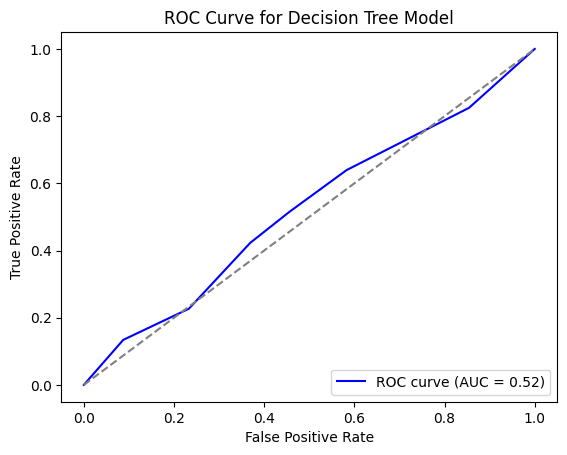

AUC Score: 0.5219697727955159


In [13]:
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Model')
plt.legend(loc='lower right')
plt.show()

print("AUC Score:", roc_auc)